### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

# Making Classification Requests to Your Model Endpoint

On your model deployment page in the OCI console, go to the 'Invoking Your Model' page and copy the model HTTP endpoint.

In [33]:
import os
import requests
import oci
from oci.signer import Signer

uri = 'your-http-endpoint-here'
print(uri)

your-http-endpoint-here


In [32]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Import data
digits = datasets.load_digits()

# Flatten images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

In [11]:
%%time 

# Payload:
# Replace this with your own testing data if you've deployed your own model, remember to jsonify the payload though!
input_data = pd.DataFrame(X_test[0:10]).to_json()
body = input_data

config = oci.config.from_file("~/.oci/config") # replace with the location of your oci config file
auth = Signer(
    tenancy=config['tenancy'],
    user=config['user'],
    fingerprint=config['fingerprint'],
    private_key_file_location=config['key_file'],
    pass_phrase=config['pass_phrase'])
    
# Submit request to model endpoint:
response = requests.post(endpoint, json=input_data, auth=auth).json()
print(response)

{'prediction': [8, 8, 4, 9, 0, 8, 9, 8, 1, 2]}
CPU times: user 32.7 ms, sys: 1.92 ms, total: 34.6 ms
Wall time: 547 ms


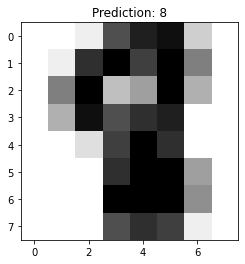

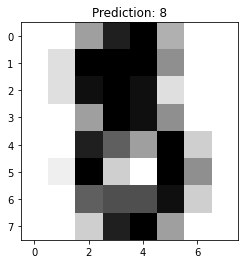

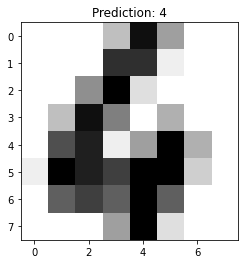

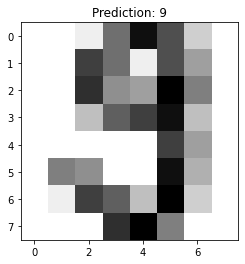

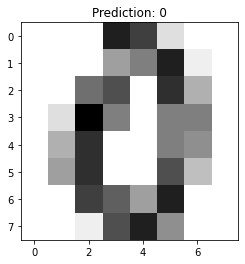

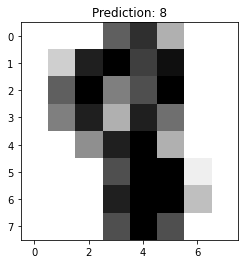

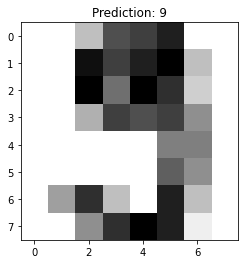

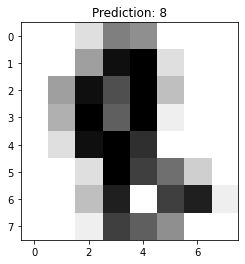

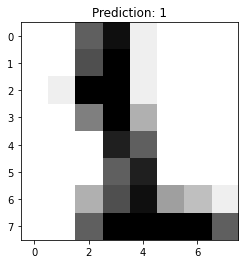

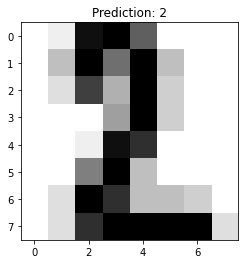

In [31]:
import matplotlib.pyplot as plt

# Display sample digits and their classifications
for image, prediction in zip(X_test, response['prediction']):
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(f'Prediction: {prediction}')
    plt.show()